In [ ]:
!pip install openai-whisper torch numpy matplotlib opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 6.6 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=51de68c34a0178ad0e70dd279ff0f8a093c5e813fed2227dc49de3cc75ba0838
  Stored in directory: /root/.cache/pip/wheels/61/d2/20/09ec9bef734d126cba375b15898010b6cc28578d8afdde5869
Successfully built openai-whisper


In [ ]:
from google.colab import files
files.upload()


Saving WhatsApp Audio 2026-01-11 at 11.07.44 AM.mp4 to WhatsApp Audio 2026-01-11 at 11.07.44 AM.mp4


{'WhatsApp Audio 2026-01-11 at 11.07.44 AM.mp4': b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00isommp42\x00\x00\x06|moov\x00\x00\x00lmvhd\x00\x00\x00\x00\xe5\x88\xe6\xab\xe5\x88\xe6\xab\x00\x00\'\x10\x00\x00\xc2+\x00\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\xadmeta\x00\x00\x00!hdlr\x00\x00\x00\x00\x00\x00\x00\x00mdta\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Fkeys\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x1bmdtacom.android.version\x00\x00\x00\x1bmdtacom.video.file.type\x00\x00\x00>ilst\x00\x00\x00\x1a\x00\x00\x00\x01\x00\x00\x00\x12data\x00\x00\x00\x01\x00\x00\x00\x0015\x00\x00\x00\x1c\x00\x00\x00\x02\x00\x00\x00\x14data\x00\x00\x00C\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05[trak\x00\x

In [ ]:
!apt-get install -y ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [ ]:
!ffmpeg -i *.mp4 sample_audio.wav


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import os
os.listdir("/content")


['.config',
 'sample_data',
 'WhatsApp Audio 2026-01-11 at 11.07.44 AM.mp4',
 'sample_audio.wav']

In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("sample_audio.wav")
text = result["text"]

print("Recognized Text:", text)


100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 133MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Recognized Text:  I am going to school is pronounced as I am


In [ ]:
def text_to_gloss(text):
    remove_words = ["is","am","are","the","a","an","to","of","in","on","for","and"]
    words = text.lower().split()
    gloss = [w.upper() for w in words if w not in remove_words]
    return gloss

gloss = text_to_gloss(text)
print("Gloss:", gloss)


Gloss: ['I', 'GOING', 'SCHOOL', 'PRONOUNCED', 'AS', 'I']


In [ ]:
import numpy as np

def gloss_to_pose(gloss):
    poses = []
    for word in gloss:
        np.random.seed(len(word))
        pose = np.random.rand(15, 2)
        poses.append(pose)
    return poses

poses = gloss_to_pose(gloss)
print("Number of sign poses:", len(poses))


Number of sign poses: 6


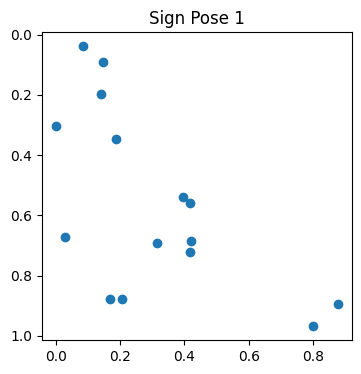

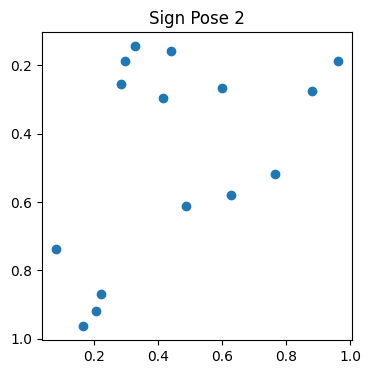

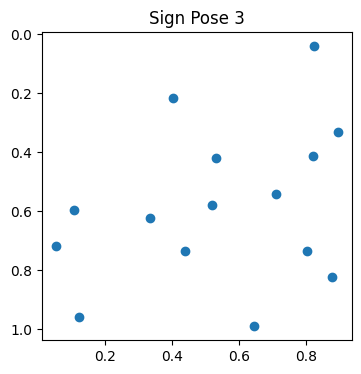

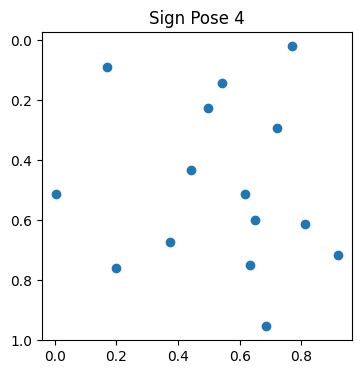

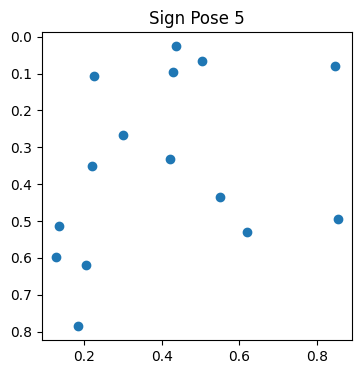

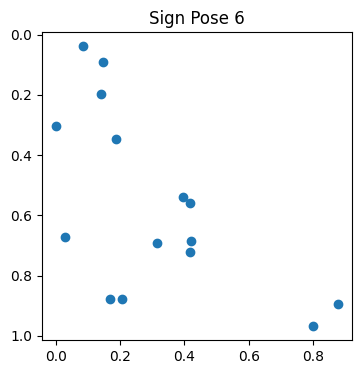

In [ ]:
import matplotlib.pyplot as plt

def draw_avatar(poses):
    for i, pose in enumerate(poses):
        x = pose[:, 0]
        y = pose[:, 1]

        plt.figure(figsize=(4,4))
        plt.scatter(x, y)
        plt.gca().invert_yaxis()
        plt.title(f"Sign Pose {i+1}")
        plt.show()

draw_avatar(poses)


In [ ]:
import os
print("Files:", os.listdir("/content"))
print("Recognized Text:", text)
print("Gloss:", gloss)
print("Number of poses:", len(poses))


Files: ['.config', 'sample_data', 'WhatsApp Audio 2026-01-11 at 11.07.44 AM.mp4', 'sample_audio.wav']
Recognized Text:  I am going to school is pronounced as I am
Gloss: ['I', 'GOING', 'SCHOOL', 'PRONOUNCED', 'AS', 'I']
Number of poses: 6
